# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [2]:
# read the data into a DataFrame named nba
import pandas as pd
path = '../data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [3]:
# examine the columns names to see what's there
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [64]:
nba[['age', 'pos']]

,age,pos
0,24,F
1,20,G
2,21,C
3,28,F
4,29,G
5,26,C
6,23,F
7,26,C
8,29,F
9,25,F


In [65]:
nba['age'].value_counts()

23    56
24    48
26    44
25    39
28    37
27    35
29    34
22    31
21    24
30    23
34    19
32    18
31    16
33    14
20    12
19     8
37     6
35     6
36     4
38     4
Name: age, dtype: int64

In [66]:
counts_age = nba['age'].value_counts()
counts_age[:10]

23    56
24    48
26    44
25    39
28    37
27    35
29    34
22    31
21    24
30    23
Name: age, dtype: int64

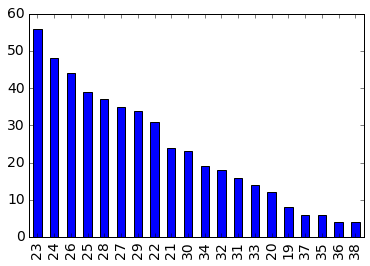

In [67]:
counts_age.plot(kind = 'bar')

In [52]:
nba['pos'].value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

In [55]:
counts_bref_team = nba['bref_team_id'].value_counts()
counts_bref_team[:10]

TOT    69
UTA    17
LAC    16
MIA    16
SAS    16
TOR    15
SAC    15
MIN    15
ORL    15
PHI    15
Name: bref_team_id, dtype: int64

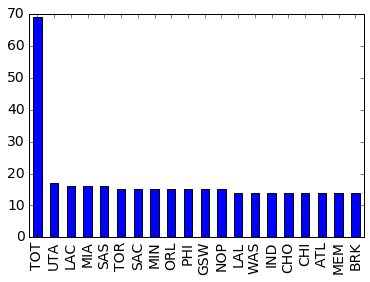

In [58]:
counts_bref_team[:20].plot(kind='bar')

In [56]:
nba.bref_team_id.value_counts()

TOT    69
UTA    17
LAC    16
MIA    16
SAS    16
TOR    15
SAC    15
MIN    15
ORL    15
PHI    15
GSW    15
NOP    15
LAL    14
WAS    14
IND    14
CHO    14
CHI    14
ATL    14
MEM    14
BRK    14
MIL    13
CLE    13
POR    13
DAL    13
HOU    12
NYK    12
DEN    11
OKC    11
BOS    10
DET    10
PHO     9
Name: bref_team_id, dtype: int64

In [60]:
team_lal = nba[nba['bref_team_id'] == "LAL"]
team_lal[:10]

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
55,2015,Carlos Boozer,F,33,LAL,61,26,24.6,5.5,10.7,...,23.4,1.5,0.9,2.4,0.077,-1.3,-1.6,-2.9,-0.3,1
64,2015,Kobe Bryant,G,36,LAL,35,35,34.5,7.6,20.4,...,34.9,-0.4,0.6,0.2,0.008,1.6,-1.2,0.4,0.7,2
88,2015,Jordan Clarkson,G,22,LAL,41,20,21.0,3.6,8.2,...,21.8,0.9,0.2,1.1,0.061,0.4,-2.1,-1.7,0.1,2
110,2015,Ed Davis,F,25,LAL,63,24,24.0,3.6,5.9,...,14.1,4.1,1.3,5.4,0.171,1.6,1.9,3.5,2.1,1
133,2015,Wayne Ellington,G,27,LAL,54,29,25.2,3.8,8.9,...,17.8,1.3,0.1,1.4,0.050,0.1,-2.3,-2.2,-0.1,2
199,2015,Xavier Henry,F,23,LAL,9,0,9.6,0.3,1.4,...,13.7,-0.1,0.0,-0.1,-0.030,-5.3,-2.3,-7.6,-0.1,1
205,2015,Jordan Hill,C,27,LAL,58,50,27.6,5.2,11.2,...,22.3,1.2,0.9,2.1,0.064,-1.7,-0.5,-2.2,-0.1,0
238,2015,Wesley Johnson,F,27,LAL,59,42,28.8,3.6,8.5,...,15.8,1.4,0.5,1.9,0.055,-0.1,-0.4,-0.6,0.6,1
249,2015,Ryan Kelly,F,23,LAL,33,20,19.8,1.4,4.7,...,13.9,-0.3,0.2,-0.1,-0.008,-3.7,-1.0,-4.7,-0.4,1
272,2015,Jeremy Lin,G,26,LAL,62,23,25.8,3.7,8.5,...,21.0,1.7,0.7,2.4,0.072,0.7,-1.3,-0.5,0.6,2


In [63]:
nba['bref_team_id'] == "LAL"

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
448    False
449    False
450    False
451    False
452    False
453    False
454    False
455    False
456    False
457    False
458    False
459    False
460    False
461    False
462    False
463    False
464    False
465    False
466    False
467    False
468    False
469    False
470    False
471    False
472    False
473    False
474     True
475    False
476    False
477    False
Name: bref_team_id, dtype: bool

In [71]:
team_lal = nba['bref_team_id'] == "TOT"
age_29 = nba['age'] == 23
nba[age_29 & team_lal]

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
47,2015,Tarik Black,C,23,TOT,44,20,16.6,1.9,3.5,...,13.0,1.0,0.6,1.6,0.107,-2.0,-0.5,-2.5,-0.1,0
66,2015,Reggie Bullock,F,23,TOT,31,2,9.3,0.8,1.9,...,10.6,0.1,0.3,0.3,0.058,-2.2,-0.3,-2.6,0.0,1
76,2015,Isaiah Canaan,G,23,TOT,34,18,18.7,2.7,7.0,...,20.1,0.7,0.5,1.1,0.085,0.5,-2.7,-2.1,0.0,2
80,2015,Michael Carter-Williams,G,23,TOT,48,45,33.1,5.6,14.3,...,27.0,-1.9,1.9,0.0,-0.001,-1.6,0.4,-1.2,0.3,2
106,2015,Troy Daniels,G,23,TOT,39,0,7.0,0.9,2.8,...,20.2,-0.2,0.0,-0.1,-0.026,-1.9,-4.8,-6.7,-0.3,2
108,2015,Brandon Davies,F,23,TOT,27,6,15.7,2.0,5.1,...,19.0,-0.2,0.4,0.2,0.026,-3.0,-0.1,-3.1,-0.1,1
253,2015,Brandon Knight,G,23,TOT,62,61,32.5,6.0,14.2,...,26.0,2.3,2.4,4.7,0.112,2.0,-0.6,1.4,1.8,2
348,2015,Adreian Payne,F,23,TOT,12,3,19.7,2.3,6.1,...,17.7,-0.3,0.1,-0.1,-0.024,-5.8,-2.5,-8.3,-0.4,1
357,2015,Dwight Powell,F,23,TOT,24,0,8.3,1.1,2.2,...,16.6,0.4,0.2,0.6,0.149,-0.3,0.4,0.1,0.1,1
376,2015,Thomas Robinson,F,23,TOT,39,4,13.1,1.8,3.7,...,18.7,-0.2,1.0,0.8,0.075,-4.8,1.0,-3.8,-0.2,1


In [74]:
nba[age_29 & team_lal][['pos', 'g', 'mp']]

,pos,g,mp
47,C,44,16.6
66,F,31,9.3
76,G,34,18.7
80,G,48,33.1
106,G,39,7.0
108,F,27,15.7
253,G,62,32.5
348,F,12,19.7
357,F,24,8.3
376,F,39,13.1


In [76]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [78]:
import numpy as np
np.array([1, 2, 3])

array([1, 2, 3])

In [79]:
pd.Series([1, 2, 3]).values

array([1, 2, 3])

In [80]:
arr = np.array([1, 2, 3])

In [81]:
arr != 2

array([ True, False,  True], dtype=bool)

In [82]:
arr[arr != 2]

array([1, 3])

In [85]:
is_age = nba['age'] == 23
age_23 = nba[is_age]
age_23['pos'].value_counts()

F    26
G    26
C     4
Name: pos, dtype: int64

In [87]:
ages_pos = age_23['pos'].value_counts()
player_count = nba['pos'].value_counts()

In [91]:
ages_pos / player_count.astype(float)

C    0.050633
F    0.130653
G    0.130000
Name: pos, dtype: float64

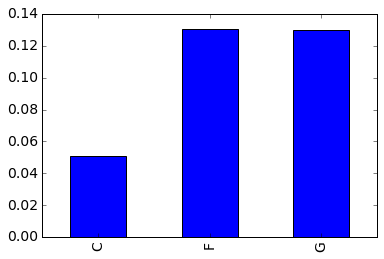

In [97]:
(ages_pos / player_count.astype(float)).plot(kind='bar')

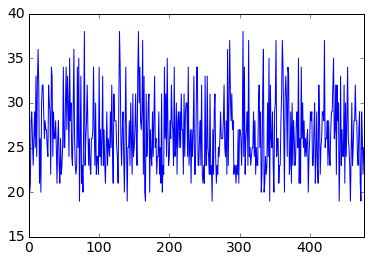

In [98]:
nba['age'].plot()

In [101]:
teams = nba[['bref_team_id']].copy()

In [102]:
teams[:5]

,bref_team_id
0,NYK
1,MEM
2,OKC
3,MIN
4,TOT


In [104]:
teams.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            468, 469, 470, 471, 472, 473, 474, 475, 476, 477],
           dtype='int64', length=478)

In [90]:
len(nba)

478

In [86]:
is_age_29 = nba['age'] == 29
age_29 = nba[is_age_29]
age_29['pos'].value_counts()

F    14
G    14
C     6
Name: pos, dtype: int64

In [5]:
nba.tail()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
473,2015,James Young,G,19,BOS,27,0,10.9,1.1,3.3,...,3.9,15.3,0.1,0.2,0.2,0.040,-1.9,-2.2,-4.1,-0.2
474,2015,Nick Young,G,29,LAL,42,0,23.8,4.1,11.3,...,7.5,26.0,1.1,0.1,1.2,0.059,1.0,-4.2,-3.2,-0.3
475,2015,Thaddeus Young,F,26,TOT,58,50,31.8,5.9,12.8,...,9.7,21.3,1.4,1.1,2.4,0.064,0.4,-0.1,0.3,1.1
476,2015,Cody Zeller,C,22,CHO,61,44,24.1,2.8,6.1,...,12.3,15.6,1.7,2.2,3.9,0.129,-1.9,2.5,0.7,1.0
477,2015,Tyler Zeller,C,25,BOS,62,39,20.8,3.9,7.1,...,10.5,19.1,3.2,1.3,4.5,0.167,0.2,0.4,0.7,0.9


In [6]:
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [8]:
# examine the number of players in each position to get a feel for the data
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [9]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})


In [10]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
feature_cols = ['ast', 'stl', 'blk', 'tov','pf']
X = nba[feature_cols]
print (X)

      ast  stl  blk  tov   pf
0     1.0  0.4  0.3  0.9  2.2
1     0.4  0.4  0.3  0.4  0.8
2     1.0  0.4  1.2  1.6  3.0
3     0.9  0.2  0.5  0.5  1.8
4     1.9  0.6  0.1  1.6  2.1
5     0.6  0.3  0.7  1.0  2.3
6     0.6  0.4  0.4  0.4  1.8
7     1.0  0.6  0.9  1.0  2.1
8     1.8  0.7  1.0  1.8  1.9
9     1.3  0.3  0.8  0.7  1.8
10    1.4  2.0  0.5  1.3  2.8
11    0.7  1.0  0.9  0.7  1.8
12    1.2  0.4  0.9  0.8  2.5
13    0.7  0.5  1.0  0.5  1.6
14    1.1  0.7  0.1  0.8  1.9
15    1.0  0.5  0.3  0.4  1.0
16    1.0  0.6  0.3  1.1  2.0
17    2.5  1.1  1.1  2.2  3.0
18    3.1  1.0  0.4  2.2  2.2
19    0.1  0.2  0.6  0.2  0.9
20    0.9  0.2  0.3  0.9  2.1
21    2.4  1.9  0.2  1.7  2.4
22    0.9  0.8  0.5  0.8  2.5
23    0.9  0.4  0.8  1.3  1.9
24    4.7  0.7  0.0  1.9  1.2
25    0.3  0.2  0.2  0.4  1.2
26    0.4  0.3  0.2  0.4  1.1
27    0.1  0.1  0.1  0.2  0.6
28    1.1  0.6  0.1  0.7  1.4
29    3.3  0.4  0.0  0.9  1.3
..    ...  ...  ...  ...  ...
448  10.0  1.8  0.6  3.7  2.3
449   0.2 

In [11]:
# create response vector (y) that contains the position numbers (our labels)
# store response vector in "y"
y = nba.pos_num
print(y)

0      1
1      2
2      0
3      1
4      2
5      0
6      1
7      0
8      1
9      1
10     2
11     1
12     1
13     0
14     2
15     1
16     1
17     2
18     1
19     0
20     1
21     1
22     1
23     0
24     2
25     1
26     1
27     1
28     2
29     2
      ..
448    2
449    1
450    1
451    2
452    1
453    1
454    1
455    2
456    0
457    1
458    2
459    2
460    2
461    1
462    2
463    2
464    1
465    2
466    1
467    1
468    0
469    2
470    1
471    1
472    2
473    2
474    2
475    1
476    0
477    0
Name: pos_num, dtype: int64


## Step 3: Train a KNN model (K=5)

In [13]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# instantiate the estimator with K=5
knn = KNeighborsClassifier(n_neighbors=5)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [15]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [16]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# run a knn.fit on the data to build the model


## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [ ]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [31]:
# make a prediction with the model

player = [1, 1, 0, 1, 2]
knn.predict(player)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [20]:
# calculate the predicted probabilities
knn.predict_proba(player)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [21]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)

In [24]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [25]:
player = [1, 1, 0, 1, 2]
knn.predict(player)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [26]:
knn.predict_proba(player)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.06,  0.62,  0.32]])

In [ ]:
# calculate predicted probabilities


## Bonus: Explore the features to ones ones that likely are the most predictive

In [32]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [34]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
nba.groupby('pos').describe()['AST%'].unstack(level=0)

pos,C,F,G
count,79.000000,199.000000,200.000000
mean,7.412658,8.744221,19.170000
std,4.424882,5.296535,10.715386
min,0.000000,0.000000,0.000000
25%,4.550000,5.650000,10.675000
50%,6.300000,7.900000,16.900000
75%,10.150000,10.450000,26.600000
max,21.400000,38.900000,48.500000


In [36]:
nba.groupby('pos').describe()['AST%'].unstack()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
C,79,7.412658,4.424882,0,4.550,6.3,10.15,21.4
F,199,8.744221,5.296535,0,5.650,7.9,10.45,38.9
G,200,19.170000,10.715386,0,10.675,16.9,26.60,48.5


In [ ]:
# box plot of assists grouped by position


In [ ]:
# group plot of histograms of assists grouped by position
